In [172]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
%matplotlib inline

In [173]:
#1a
df = pd.read_csv('data/regression_part1.csv', delimiter=',')

In [174]:
df.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


In [175]:
import math

for f in ["revision_time", "exam_score"]:
    dff = df[f]
    qs = dff.min(), dff.max(), dff.mean(), dff.median(), math.sqrt(dff.var())
    qs = tuple(map(lambda x:format(x, '.2f'),qs))
    print(*qs, sep=" & ")

2.72 & 48.01 & 22.22 & 21.69 & 13.99
14.73 & 94.94 & 49.92 & 47.83 & 20.93


In [176]:
#1b
X = np.column_stack((np.ones((len(df),1)), df[["revision_time"]].values))
Y =  df[["exam_score"]].values
regr = LinearRegression(fit_intercept=False).fit(X,Y)

print(regr.coef_)
print(format(regr.coef_[0][0], '.2f'), format(regr.coef_[0][1], '.2f'))

[[17.89768026  1.44114091]]
17.90 1.44


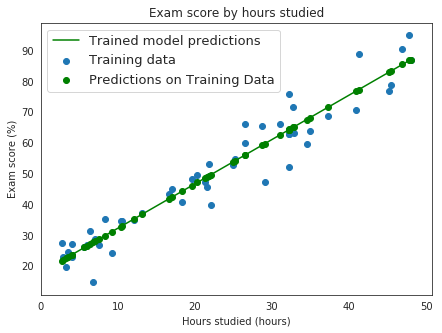

In [177]:
#1c
sns.set_style("white")
plt.figure(figsize=(7,5))
axes = plt.axes()
plt.scatter(df["revision_time"], df["exam_score"], label="Training data")

y_pred = regr.predict(X=X)
# maybe do an actual line at some point, so that this doesn't look bad
plt.plot(df["revision_time"], y_pred, c="g", label="Trained model predictions") #equationString)
plt.scatter(df["revision_time"],y_pred, c="g", label="Predictions on Training Data")
plt.xlabel("Hours studied (hours)")
axes.set_ylabel("Exam score (%)")
plt.title("Exam score by hours studied")
plt.legend(fontsize=13)
plt.savefig('imgs/1c.png')
plt.show()

In [81]:
#1d
# X is a matrix with a column of ones and a column with revision times
# Y is a column vector with exam scores
w_hat = np.linalg.inv(X.transpose() @ X) @ (X.transpose()) @ Y
w_hat

array([[17.89768026],
       [ 1.44114091]])

In [83]:
#1e comparison
Y

array([[27.682],
       [22.998],
       [19.765],
       [24.481],
       [22.974],
       [27.086],
       [26.136],
       [27.038],
       [31.283],
       [14.731],
       [28.946],
       [26.901],
       [35.299],
       [24.228],
       [34.651],
       [34.667],
       [34.848],
       [37.266],
       [43.491],
       [45.201],
       [40.924],
       [48.321],
       [49.574],
       [47.239],
       [45.582],
       [53.182],
       [39.956],
       [52.697],
       [54.9  ],
       [66.065],
       [60.068],
       [65.432],
       [47.34 ],
       [66.051],
       [62.916],
       [62.892],
       [52.066],
       [75.787],
       [71.807],
       [63.339],
       [59.794],
       [63.983],
       [68.714],
       [70.767],
       [88.973],
       [76.957],
       [78.698],
       [90.384],
       [94.945],
       [86.968]])

In [37]:
#1f
def avg(li):
    return sum(li)/len(li)

def mse(y_hats, ys):
    return ((y_hats-ys)**2).mean()

MSE_sklearn = mse(regr.predict(X=X), Y)
MSE_mine = mse(X@(w_hat), Y)

print(format(MSE_sklearn,'.3f'), format(MSE_mine,'.3f'), MSE_sklearn-MSE_mine)

30.985 30.985 -1.0658141036401503e-14


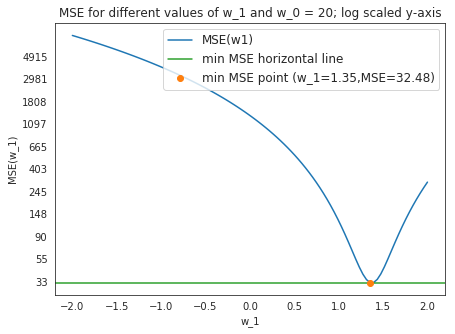

In [179]:
#1g

sns.set_style("white")
plt.figure(figsize=(7,5))
ax = plt.axes()
w_0 = 20
w_1s = np.linspace(-2,2,100)
def MSE_for_w1(w_1):
    return mse(X@np.array([[w_0], [w_1]]), Y)

MSEs = list(map(lambda w_1: MSE_for_w1(w_1), w_1s))

best_MSE, best_w1 = min(zip(MSEs, w_1s))

plt.xlabel("w_1")
ax.set_ylabel("MSE(w_1)")
plt.title("MSE for different values of w_1 and w_0 = 20; log scaled y-axis")

plt.yscale('log')
plt.yticks(np.exp(np.arange(0, np.log(max(MSEs)), 0.5)))
plt.plot(w_1s, MSEs, label="MSE(w1)", c='tab:blue')
plt.axhline(y=best_MSE, color='tab:green', linestyle='-', label=f"min MSE horizontal line")
plt.plot([best_w1],[best_MSE], '.', markersize=12, color="tab:orange", label=f'min MSE point (w_1={round(best_w1,2)},MSE={round(best_MSE,2)})')
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.legend(fontsize=12, loc='upper right')
plt.savefig("imgs/1g.png")
plt.show()

In [167]:
# Reading data part 2
df = pd.read_csv('data/regression_part2.csv', delimiter=',')
df.describe()

,input,output
count,25.000000,25.00000
mean,0.817480,5.90728
std,3.277051,12.43568
min,-4.826000,-15.57700
25%,-2.588000,-1.46500
50%,2.633000,6.92900
75%,3.276000,11.38200
max,4.875000,32.97600


In [118]:
print(np.exp(np.arange(0, np.log(max(MSEs)), 0.5)))

[1.00000000e+00 1.64872127e+00 2.71828183e+00 4.48168907e+00
 7.38905610e+00 1.21824940e+01 2.00855369e+01 3.31154520e+01
 5.45981500e+01 9.00171313e+01 1.48413159e+02 2.44691932e+02
 4.03428793e+02 6.65141633e+02 1.09663316e+03 1.80804241e+03
 2.98095799e+03 4.91476884e+03]


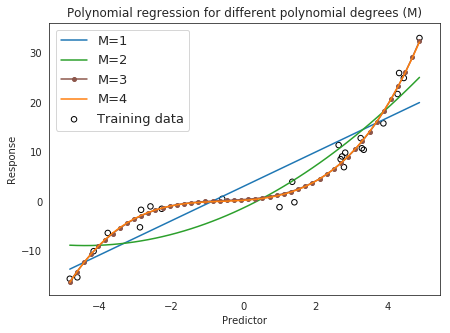

In [168]:
# 2a/2b

sns.set_style("white")
plt.figure(figsize=(7,5))
Y =  df[["output"]].values
X_base = df[["input"]].values
MSE = [0,0,0,0]

for i in range(4):
    poly = PolynomialFeatures(i+1)
    X = poly.fit_transform(X_base)
    regr = LinearRegression(fit_intercept=False).fit(X,Y)
    
    MSE[i] = mse(Y, regr.predict(X=X))
    
    X_base_axis = np.linspace(df[["input"]].values.min(), df[["input"]].values.max(), 50).reshape(-1,1)
    X_axis = PolynomialFeatures(i+1).fit_transform(X_base_axis)
    Y_axis = regr.predict(X=X_axis)
    plt.plot(X_base_axis, Y_axis, color=['tab:blue','tab:green','tab:brown','tab:orange'][i], marker=['None', 'None', '.', 'None'][i], markersize=8,label=f"M={i+1}")
    
plt.scatter(X_base, Y, s=30, facecolors='none', edgecolors='k', label="Training data")
plt.legend(fontsize=13)
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title("Polynomial regression for different polynomial degrees (M)")
plt.savefig("imgs/2a.png")

0.2134256934488399


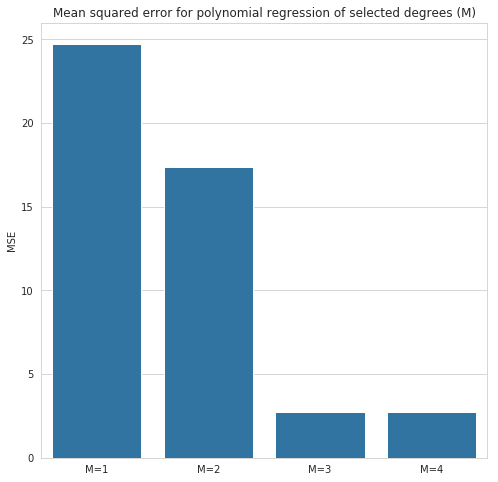

In [123]:
# 2b
# TODO: MAYBE ADD A TITLE
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
ax = sns.barplot(x=[1,2,3,4], y=MSE, color='tab:blue')
ax.set_xticklabels([f'M={i}' for i in range(1,5)])
plt.ylabel('MSE')
plt.title('Mean squared error for polynomial regression of selected degrees (M)')
plt.savefig('imgs/2b.png')

print((MSE[2]-MSE[3])/MSE[3]*100)

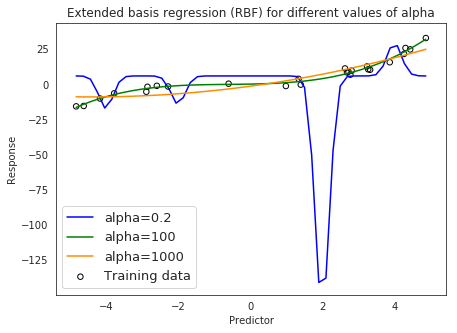

In [170]:
# 2d
sns.set_style("white")

def rbf(x,c,a):
    return np.exp(-0.5*(x-c)**2/(a**2))


def phi(X_base, a):
    return np.column_stack((np.ones((len(X_base),1)), *[rbf(X_base,c,a) for c in [-4.0, -2.0, 2.0, 4.0]]))

plt.figure(figsize=(7,5))

X = df[["input"]].values
Y =  df[["output"]].values
MSE = []
alphas = [0.2, 100, 1000]

for i in range(len(alphas)):
    a = alphas[i]
    regr = LinearRegression(fit_intercept=False).fit(phi(X, a),Y)
    
    MSE.append(mse(Y, regr.predict(X=phi(X, a))))
    
    X_base_axis = np.linspace(df[["input"]].values.min(), df[["input"]].values.max(), 50).reshape(-1,1)
    Y_axis = regr.predict(X=phi(X_base_axis, a))
    if i < 3:
        plt.plot(X_base_axis, Y_axis, color=['b','g','darkorange','red','yellow','violet', 'brown'][i%7],label=f"alpha={a}")
    
plt.scatter(X_base, Y, s=30, facecolors='none', edgecolors='k', label="Training data")
plt.legend(fontsize=13)
plt.title('Extended basis regression (RBF) for different values of alpha')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.savefig("imgs/2d.png")

Text(0.5,0,'alpha')

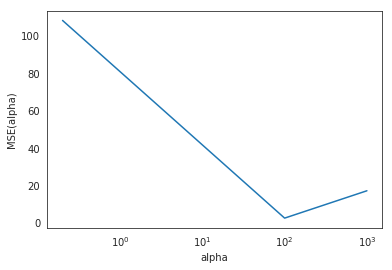

In [125]:
plt.xscale('log')
plt.plot(alphas, MSE)
plt.ylabel('MSE(alpha)')
plt.xlabel('alpha')
#plt.savefig('imgs/2dMSE.png')

In [153]:
print(format(0.504999999999999, '.2f'))

0.50


In [139]:
#3a
# Load the data
train = pd.read_csv('data/faces_train_data.csv', delimiter=',')
train_Y = train[['smiling']].values
train_X = train.drop(['smiling'], axis='columns')
test = pd.read_csv('data/faces_test_data.csv', delimiter=',')
test_Y = test[['smiling']].values
test_X = test.drop(['smiling'], axis='columns')

print(train.shape, test.shape)
print(test.describe())


(4800, 137) (1200, 137)
                x0           y0           x1           y1           x2  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean     -1.924105     1.466505    -1.913906     1.015347    -1.854442   
std       0.586384     0.412054     0.548511     0.389851     0.529543   
min      -3.846000    -2.116000    -3.673000    -2.341000    -3.487000   
25%      -2.250000     1.243000    -2.220250     0.816000    -2.150000   
50%      -1.949000     1.465000    -1.921000     1.016000    -1.860500   
75%      -1.626250     1.686500    -1.627750     1.221500    -1.562750   
max       1.613000     3.641000     1.067000     3.205000     0.522000   

                y2           x3           y3           x4           y4  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean      0.556578    -1.742358     0.100410    -1.549113    -0.322024   
std       0.368793     0.524712     0.348176     0.498277     0.322613   
min      -2.5

In [93]:
for i, key in enumerate(train.describe().keys()):
    print(key)
    if i%2==0:
        assert key == f'x{i//2}'
    else:
        assert key == f'y{i//2}'

x0
y0
x1
y1
x2
y2
x3
y3
x4
y4
x5
y5
x6
y6
x7
y7
x8
y8
x9
y9
x10
y10
x11
y11
x12
y12
x13
y13
x14
y14
x15
y15
x16
y16
x17
y17
x18
y18
x19
y19
x20
y20
x21
y21
x22
y22
x23
y23
x24
y24
x25
y25
x26
y26
x27
y27
x28
y28
x29
y29
x30
y30
x31
y31
x32
y32
x33
y33
x34
y34
x35
y35
x36
y36
x37
y37
x38
y38
x39
y39
x40
y40
x41
y41
x42
y42
x43
y43
x44
y44
x45
y45
x46
y46
x47
y47
x48
y48
x49
y49
x50
y50
x51
y51
x52
y52
x53
y53
x54
y54
x55
y55
x56
y56
x57
y57
x58
y58
x59
y59
x60
y60
x61
y61
x62
y62
x63
y63
x64
y64
x65
y65
x66
y66
x67
y67
smiling


AssertionError: 

In [133]:
for s in ['x', 'y']:
    train_described = train.describe()[[f'{s}{i}' for i in range(68)]]
    test_described = test.describe()[[f'{s}{i}' for i in range(68)]]
    #sum([train_described[key]['mean'] for key in train_described.keys() if key[0]=='x'])/68
    print(f'train has min-max {s}', format((train_described.iloc[3]).values.min(),'.2f'), format((train_described.iloc[-1]).values.max(),'.2f'))
    print(f'test has min-max {s}', format((test_described.iloc[3]).values.min(), '.2f'), format((test_described.iloc[-1]).values.max(), '.2f'))

train has min-max x -3.98 3.92
test has min-max x -3.85 3.90
train has min-max y -3.52 3.58
test has min-max y -2.62 3.64


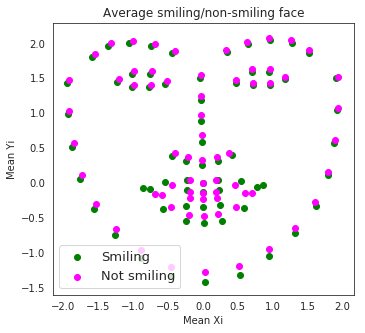

In [129]:
#3b
plt.figure(figsize=(7,5))

coords_smiling = train_X[train_Y==1].describe().loc['mean'].values
coords_sad = train_X[train_Y==0].describe().loc['mean'].values

plt.scatter(coords_smiling[[i for i in range(68*2) if i%2==0]], coords_smiling[[i for i in range(68*2) if i%2==1]], c='g', label='Smiling')
plt.scatter(coords_sad[[i for i in range(68*2) if i%2==0]], coords_sad[[i for i in range(68*2) if i%2==1]], label='Not smiling', 
            color='magenta')
plt.title('Average smiling/non-smiling face')
plt.xlabel('Mean Xi')
plt.ylabel('Mean Yi')
plt.legend(fontsize=13)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('imgs/3b.png')

In [141]:
# 3e

for max_depth in [2, 8, 20]:
    dtc = DecisionTreeClassifier(random_state = 2001, max_depth = max_depth)
    dtc.fit(train_X, train_Y)
    
    train_Y_pred = dtc.predict(train_X).reshape(-1,1)
    train_accuracy = format((train_Y_pred == train_Y).mean()*100, '.2f')
    
    test_Y_pred = dtc.predict(test_X).reshape(-1,1)
    test_accuracy = format((test_Y_pred == test_Y).mean()*100, '.2f')
    
    print(f'{max_depth} & {train_accuracy}\\% & {test_accuracy}\\%\\\\')
    #print(f'for depth={max_depth}: train accuracy: {train_accuracy}% test accuracy: {test_accuracy}%')

2 & 79.48\% & 78.17\%\\
8 & 93.35\% & 84.08\%\\
20 & 100.00\% & 81.58\%\\


In [155]:
# 3f

dtc = DecisionTreeClassifier(random_state = 2001, max_depth = 8)
dtc.fit(train_X, train_Y)
with_idx =  list(enumerate(dtc.feature_importances_))
def lab(idx):
    if idx%2 == 0:
        return f'x{idx//2}'
    else:
        return f'y{idx//2}'
with_labels = list(map(lambda tup: (tup[1], lab(tup[0])), with_idx))
with_labels.sort(reverse=True)
labels_top3 = list(map(lambda tup: tup[1],  with_labels[:3]))
labels_top3

['x50', 'y48', 'y29']

In [157]:
round(train_X.describe()[['x50']], 2), round(train_X.describe()[['y50']], 2)

(           x50
 count  4800.00
 mean     -0.20
 std       0.04
 min      -0.33
 25%      -0.23
 50%      -0.20
 75%      -0.18
 max       0.11,
            y50
 count  4800.00
 mean      0.04
 std       0.03
 min      -0.23
 25%       0.02
 50%       0.04
 75%       0.06
 max       0.22)

In [159]:
# 4 data loading

df = pd.read_csv('data/classification_eval_1.csv', delimiter=',')
df.describe()

,gt,alg_1,alg_2,alg_3,alg_4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.202000,0.493739,0.518386,0.491591,0.743101
std,0.401693,0.383203,0.426419,0.304036,0.194130
min,0.000000,0.000000,0.000000,0.000000,0.167336
25%,0.000000,0.074081,0.000000,0.248341,0.597597
50%,0.000000,0.498969,0.549211,0.476655,0.760082
75%,0.000000,0.887967,1.000000,0.732685,0.919085
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
# 4a
df_cls = df > 0.5
df_cls

,gt,alg_1,alg_2,alg_3,alg_4
0,False,False,False,True,True
1,False,True,True,True,True
2,True,False,True,False,True
3,True,True,True,False,True
4,False,True,False,False,True
5,False,True,False,False,True
6,False,True,True,False,True
7,False,False,True,True,True
8,False,False,False,True,True
9,False,False,True,True,False


In [164]:
gt_cls = df_cls[['gt']].values

for i in range(1,5):
    alg_i_cls = df_cls[[f'alg_{i}']].values
    print(f'$Alg_{i}$ & ${format(accuracy_score(gt_cls, alg_i_cls)*100,".1f")} $\\%\\\\')


$Alg_1$ & $61.6 $\%\\
$Alg_2$ & $55.0 $\%\\
$Alg_3$ & $32.1 $\%\\
$Alg_4$ & $32.9 $\%\\


In [165]:
# 4b

for i in range(1,5):
    alg_i_prb = df[[f'alg_{i}']].values
    auc = roc_auc_score(gt_cls, alg_i_prb)
    auc_rounded = format(auc, '.2f')
    print(f'$Alg_{i}$ & ${auc_rounded}$\\\\')

$Alg_1$ & $0.73$\\
$Alg_2$ & $0.63$\\
$Alg_3$ & $0.06$\\
$Alg_4$ & $0.85$\\


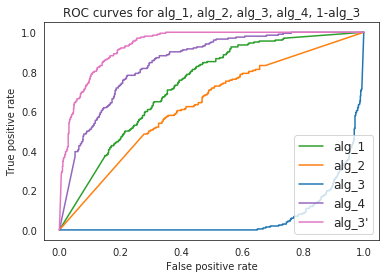

In [57]:
# 4c

for i in range(1,5):
    alg_i_prb = df[[f'alg_{i}']].values
    fpr, tpr, thresholds = roc_curve(gt_cls, alg_i_prb)
    
    plt.plot(fpr, tpr, c=['tab:green', 'tab:orange', 'tab:blue', 'tab:purple'][i-1], label=f'alg_{i}')


alg_i_prb = df[['alg_3']].values
fpr, tpr, thresholds = roc_curve(gt_cls, 1.0-alg_i_prb)
plt.plot(fpr,tpr, c='tab:pink', label='alg_3\'')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves for alg_1, alg_2, alg_3, alg_4, 1-alg_3')

plt.legend(fontsize=12, loc='lower right')
plt.savefig('imgs/4c.png')

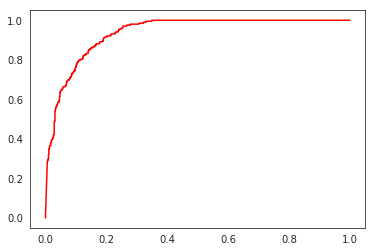